<a href="https://colab.research.google.com/github/Taghreed-Alzahrani/-Naive-Bayes-/blob/main/Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Required Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Data Loading

In [ ]:
data = pd.read_csv('/content/diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Processing

In [ ]:
 # To drop rows with missing values
data.dropna(inplace=True)

In [ ]:
# all the columns except the 'Outcome' column
X = data.drop(columns='Outcome')
# Target variable to predict (whether a person has diabetes or not)
y = data['Outcome']

In [ ]:
#Split the Data into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 #20% of the data is used for testing, and 80% is used for training.

# Model Building and Training

In [ ]:
 #instance of GaussianNB are stored in the variable model
model = GaussianNB()
#method trains the model to learn the relationship between the features and the target variable.
model.fit(X_train, y_train)

GaussianNB()

# Model Evaluation

In [ ]:
#The predicted outcomes in x_test are stored in y_pred.
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_pred, y_test, average="weighted")
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("F1 Score:", f1)
print("Classification Report:\n", report)

Accuracy: 0.77
F1 Score: 0.7645425654107151
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



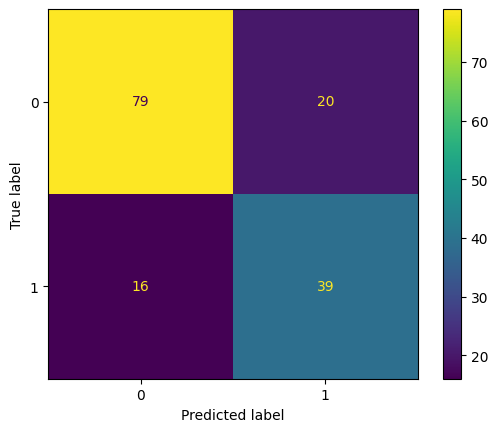

In [ ]:
#confusion matrix to understand how many instances of each class were correctly or incorrectly classified.
labels = ["0", "1"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();